In [5]:
import numpy as np
import pandas as pd
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Importing the dataset

In [3]:
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:,1:13].values
y = dataset.iloc[:,-1].values

#Visualization

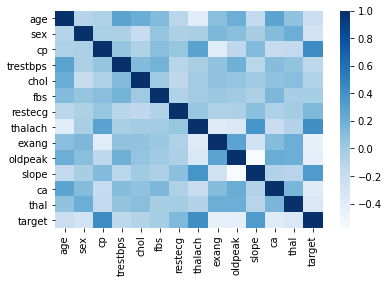

In [7]:
sns.heatmap(dataset.corr(), cmap='Blues')

There is not much correrelation between the independent variables.

#Pre_Processing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc1= StandardScaler()
X_train=sc1.fit_transform(X_train)
X_test=sc1.transform(X_test)

#Model Selection

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.0024173154808041063, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=90, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
classifier.fit(X_train, y_train)


LogisticRegression(C=0.0024173154808041063, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=90, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#Hyper Parameter Tuning

In [11]:
param=[{'penalty':['l1','l2','elasticnet','none'],'C':np.logspace(-4,0.15,4,20),
'solver':['lbfgs','newton-cg','liblinear','sag','saga'],'max_iter':[90,1000,2500,5000]}]

from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(classifier,param_grid=param,cv=5,verbose=True,n_jobs=-1)
best_clf=clf.fit(X_train,y_train)
best_parameters=best_clf.best_estimator_
print(best_parameters)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(C=0.0024173154808041063, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=90, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    3.1s finished


#Results

Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

Training Accuracy : 0.8512396694214877
Testing Accuracy : 0.8688524590163934
Sensitivity :  0.88
Specificity :  0.8611111111111112
The AUC Score:  0.8632897603485838


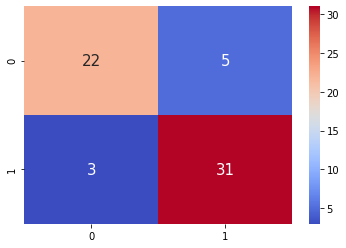

In [17]:
y_predict=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
# Classification Report
print('Classification Report :')
print(classification_report(y_test,y_predict))

# Traing & Testing Accuracy
print("Training Accuracy :", classifier.score(X_train, y_train))
print("Testing Accuracy :", classifier.score(X_test, y_test))

#Confusion Matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot = True, annot_kws = {'size':15}, cmap = 'coolwarm')

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

# ROC-AUC Score
print('The AUC Score: ',roc_auc_score(y_test,y_predict))



In [ ]:
accuracy

0.8688524590163934

In [ ]:
best_parameters

LogisticRegression(C=0.0024173154808041063, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=90, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)